# ASASSN-21qj lightcurve analysis

Announced by ASAS-SN on Twitter, on their transients page at: http://www.astronomy.ohio-state.edu/asassn/transients.html

Light curve at:

https://asas-sn.osu.edu/sky-patrol/coordinate/c4765b75-bfa4-4fc6-9d3a-9b3d11555506



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from astropy.io import ascii
from astropy import constants as c
from astropy import units as u
from kepler3 import *

In [3]:
t = ascii.read('light_curve_81989198-027e-414e-9346-94284fcc74b7.csv')

# just look at the g band

tg = t[(t['Filter']=='g') * (t['flux_err'] < 0.5)]

In [4]:
mjd = tg['HJD']-2400000.
print(mjd)


       HJD        
------------------
58282.474160000216
 58282.47538000019
 58282.47660000017
 58284.47838999983
58284.479609999806
 58284.48082000017
 58285.47556999978
58289.463680000044
 58289.46490000002
 58289.46613000007
               ...
 59565.76919999998
59565.770459999796
 59567.65525999991
 59567.65650000004
 59567.65773000009
 59570.83018000005
 59570.83142999979
 59570.83267999999
 59573.80178999994
 59573.80303000007
  59573.8042700002
Length = 2126 rows


<IPython.core.display.Javascript object>


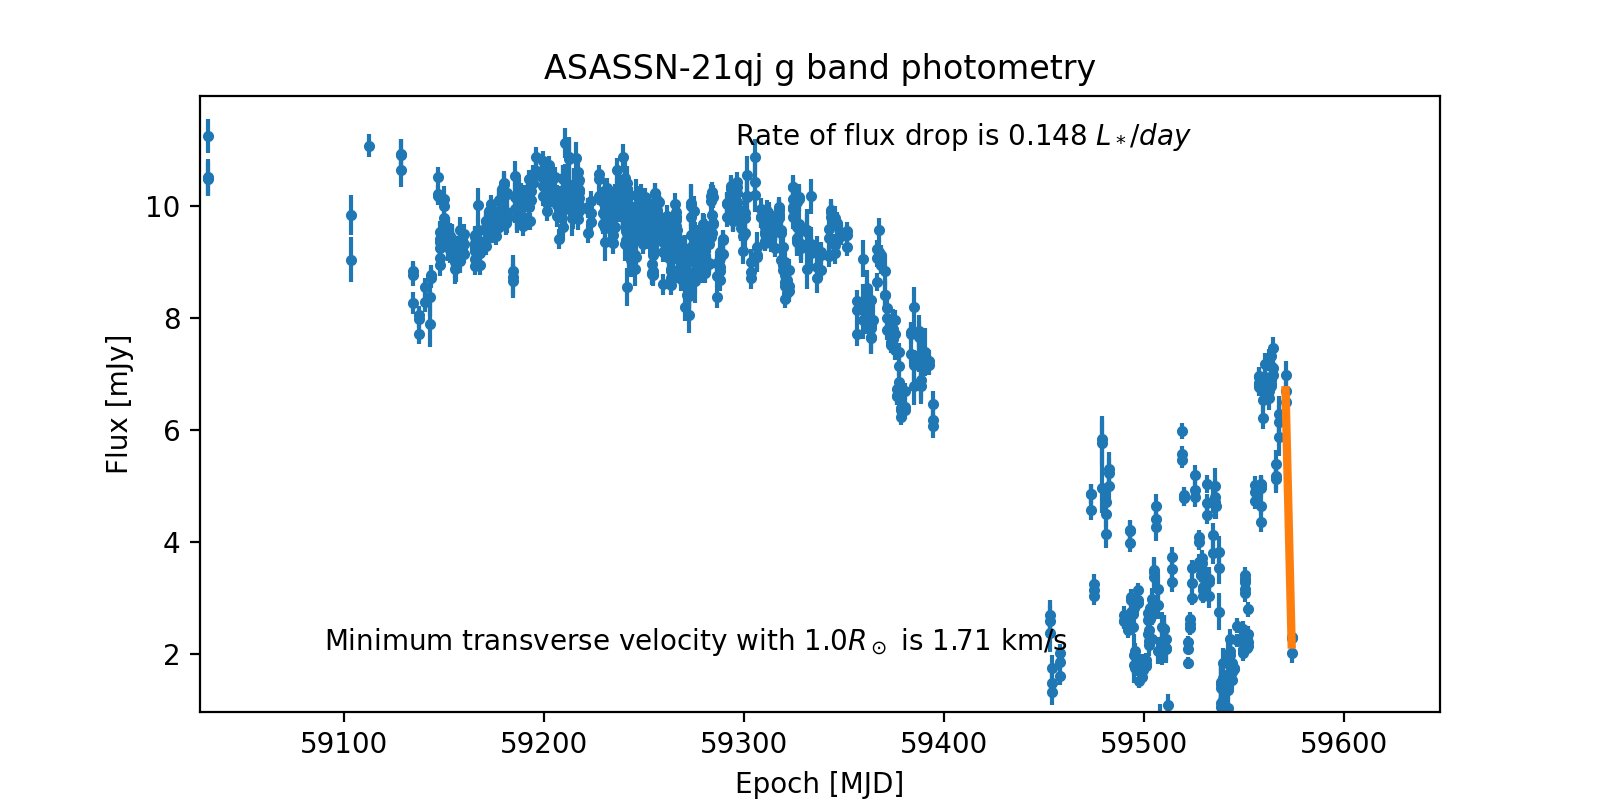

1.7068656371116002


In [8]:
fi, ax = plt.subplots(1,1,figsize=(8,4))

#ax.plot(t['HJD']-2450000., t['mag'],yerr=t['mag_err'])
ax.errorbar(mjd, tg['flux(mJy)'],yerr=tg['flux_err'],fmt='.')
ax.set_xlim(59250,59870)
ax.set_ylim(0,11)
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel('Flux [mJy]')
ax.set_title('ASASSN-21qj g band photometry')

# when did the NEOWISE photometry change
tneo = np.array([58074., 58225.])


# by eye... forgive me for I know not what I have done.

t1 = 59535.56 
f1 = 4.93
t2 = 59538.
f2 = 1.14

t1 = 59570.76 
f1 = 6.71
t2 = 59573.82
f2 = 2.17

ax.plot((t1,t2),(f1,f2),linewidth=3,zorder=10)

f_norm = 10.

df = (f1-f2)/f_norm
dt = t2-t1

dfdt = df/dt
tx = 'Rate of flux drop is {:.3f} $L_*/day$'.format(dfdt)
ax.text(0.8, 0.92, tx, ha='right',transform=ax.transAxes)

def dxdtmin (ldot,rstar): # equation 12 from van Werkhoeven 2014 MNRAS 441 2845
    vmin = 13 * ldot * rstar / 1.13
    return vmin # km/s

print(dxdtmin(dfdt,1.0))
t4 = r'Minimum transverse velocity with 1.0$R_\odot$ is {:.2f} km/s'.format(dxdtmin(dfdt,1.0))

ax.text(0.1, 0.1, t4, ha='left',transform=ax.transAxes)
ax.axvline(x=tneo[0],color='red')
ax.axvline(x=tneo[1],color='red')


In [6]:
P_orb = Pgivenm1m2vcirc(1.0*u.Msun, 1.0 * u.Mjup, 1.79 * u.km/u.s)
print(P_orb)

4611.5064414959825 yr


In [8]:
d_obj = (250 * u.day * 1.79 * (u.km / u.s)).to(u.au)
d_obj

<Quantity 0.25845288 AU>

<IPython.core.display.Javascript object>


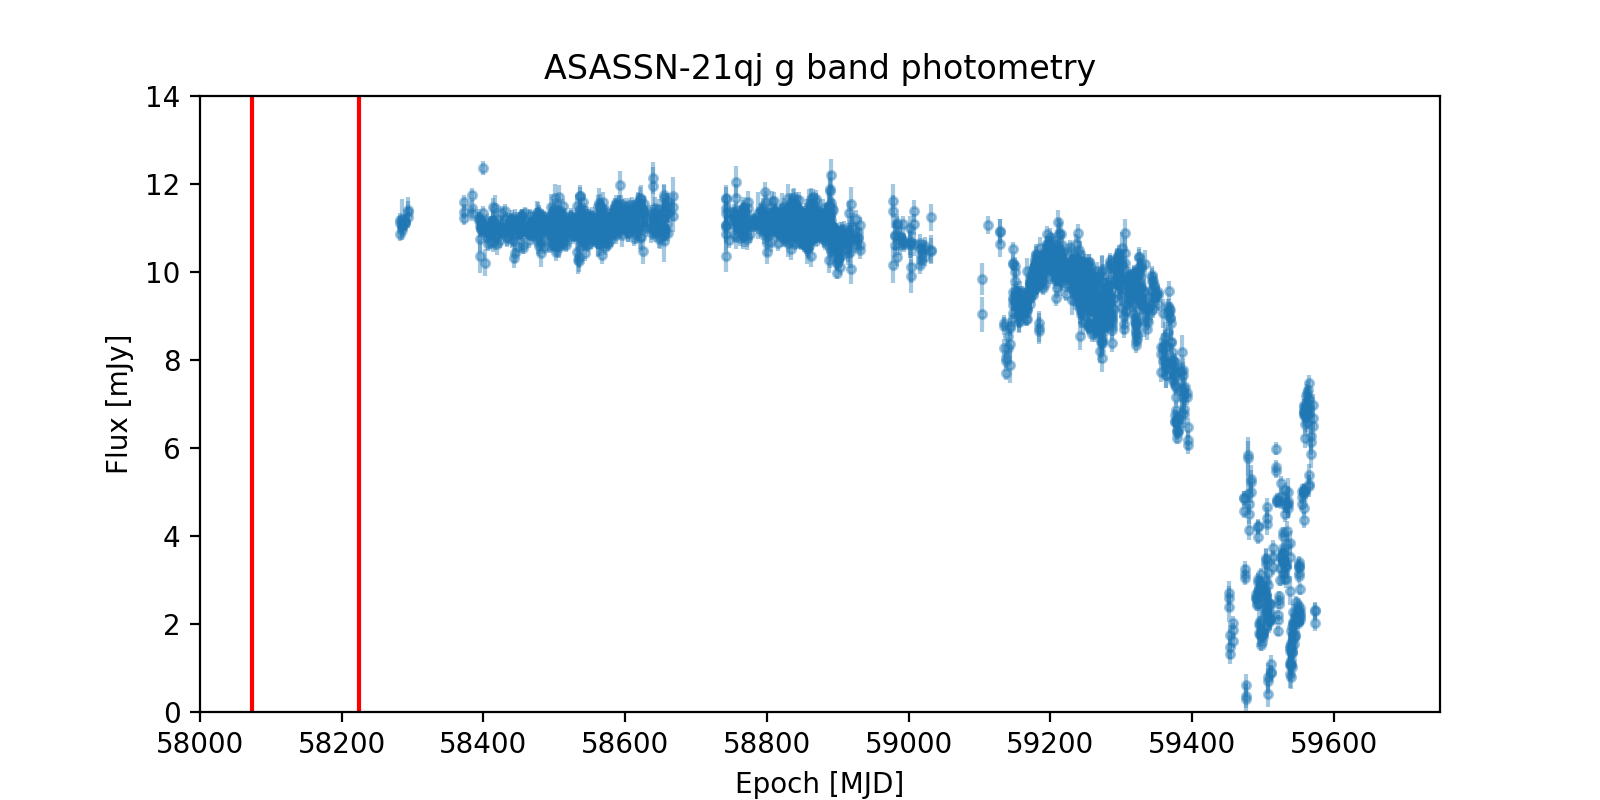

In [15]:
fi, ax = plt.subplots(1,1,figsize=(8,4))
ax.errorbar(mjd, tg['flux(mJy)'],yerr=tg['flux_err'],fmt='.',alpha=0.4)
ax.set_xlim(58000,59750)
ax.set_ylim(0,14)
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel('Flux [mJy]')
ax.set_title('ASASSN-21qj g band photometry')

# when did the NEOWISE photometry change
tneo = np.array([58074., 58225.])

ax.axvline(x=tneo[0],color='red')
ax.axvline(x=tneo[1],color='red')
fi.savefig("ASAS-photometry.pdf")